# **Spit some [tensor] flow**

Practice makes perfect

`Let's get this over with`


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [42]:
!wget --passive-ftp --prefer-family=ipv4 https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

--2020-05-26 09:11:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K   525KB/s    in 0.5s    

2020-05-26 09:11:56 (525 KB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]



In [43]:
!ls

Bike-Sharing-Dataset.zip  day.csv  hour.csv  Readme.txt  sample_data


In [44]:
!unzip Bike-Sharing-Dataset.zip

Archive:  Bike-Sharing-Dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Readme.txt              
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: day.csv                 
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: hour.csv                


In [0]:
!rm Bike-Sharing-Dataset.zip 

In [46]:
!ls

day.csv  hour.csv  Readme.txt  sample_data


In [47]:
data = pd.read_csv('hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [48]:
categoricals = ['weathersit', 'season', 'mnth', 'hr', 'weekday']
for col in categoricals:
  dummies = pd.get_dummies(data[col], prefix=col, drop_first=False)
  data = pd.concat([data, dummies], axis = 1)

data = data.drop(categoricals, axis=1)
data.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
drop_cols = "instant,dteday,workingday,atemp".split(",")
data = data.drop(drop_cols, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
from sklearn.preprocessing import StandardScaler
numericals = ['temp', 'hum', 'windspeed', 'registered', 'cnt','casual']
scaler = StandardScaler()
data[numericals] = scaler.fit_transform(data[numericals])

In [0]:
targets = ['cnt', 'casual', 'registered']
y = data[targets]

In [0]:
X = data.drop(targets, axis=1)

In [0]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [54]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13903, 56)
(13903, 3)
(3476, 56)
(3476, 3)


In [0]:
N, D = X_train.shape

In [0]:
Y = y_train.shape[1]

In [0]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [0]:
i_layer = Input(shape=(D,))
h_layer = Dense(10, activation='relu')(i_layer)
h_layer = Dense(10, activation='relu')(h_layer)
o_layer = Dense(Y, activation='relu')(h_layer)
model = Model(i_layer, o_layer)

In [0]:
model.compile(
    optimizer='adam',
    loss='mse')

In [63]:
report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
435/435 [==============================] - 1s 2ms/step - loss: 0.7924 - val_loss: 0.6505
Epoch 2/100
435/435 [==============================] - 1s 2ms/step - loss: 0.5341 - val_loss: 0.4796
Epoch 3/100
435/435 [==============================] - 1s 2ms/step - loss: 0.4437 - val_loss: 0.4312
Epoch 4/100
435/435 [==============================] - 1s 2ms/step - loss: 0.4153 - val_loss: 0.4103
Epoch 5/100
435/435 [==============================] - 1s 2ms/step - loss: 0.3964 - val_loss: 0.3979
Epoch 6/100
435/435 [==============================] - 1s 2ms/step - loss: 0.3836 - val_loss: 0.3816
Epoch 7/100
435/435 [==============================] - 1s 2ms/step - loss: 0.3716 - val_loss: 0.3679
Epoch 8/100
435/435 [==============================] - 1s 2ms/step - loss: 0.3586 - val_loss: 0.3608
Epoch 9/100
435/435 [==============================] - 1s 2ms/step - loss: 0.3527 - val_loss: 0.3564
Epoch 10/100
435/435 [==============================] - 1s 2ms/step - loss: 0.3494 - val_lo

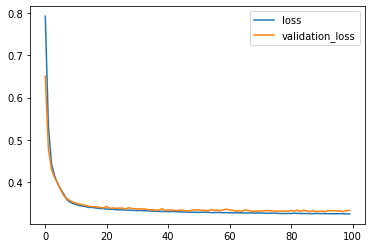

In [64]:
plt.plot(report.history['loss'], label="loss")
plt.plot(report.history['val_loss'], label="validation_loss")
plt.legend()